In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

### You are assigned the following task
- A Company X wanted to prject their future revenues for next year 2021
- The company Started in 2010 and has a monthly revenue of 60,000 +- 5,000
- The Compan Sells Shoes that accounts for 40% +- 10% of their Revenues (COGS)
- Calculate the potential expected Revenues, COGS and their potential Gross Profits for next year 

## Project Approach
- We will need a date time frame to generate monthly data for the company from 2010 to 2020
- We will also need to get the annual Revenue for the company for the most recent year
- We will create a Data Frame to work with this data

## Generate Date Time Frame
- 120 months will give us from 2010 to 2020
- we will use a normal distribution of monthly revenues to generate each month with a standard deviation of 5,000
- we will add these to a data frame

In [3]:
date_Range = pd.date_range(start = "2010-1-1", freq="M", periods = 120)

In [4]:
Monthly_revenue = np.random.normal(60000,5000,120)

In [5]:
company_monthly_revenue = pd.DataFrame(Monthly_revenue, columns=["Revenue"], index=date_Range)

### Monthly Revenues
- We can see that the monthls revenues has a mean of 60,00 
- This allows us to give the company a realistic Volatility in revenue

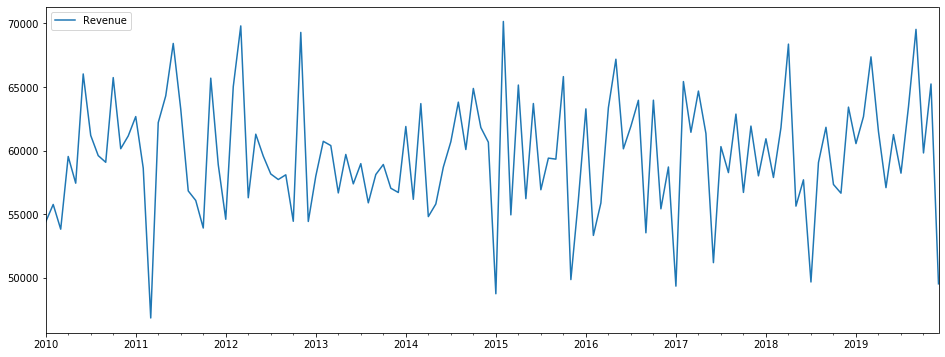

In [6]:
company_monthly_revenue.plot(figsize = (16,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123202110>]],
      dtype=object)

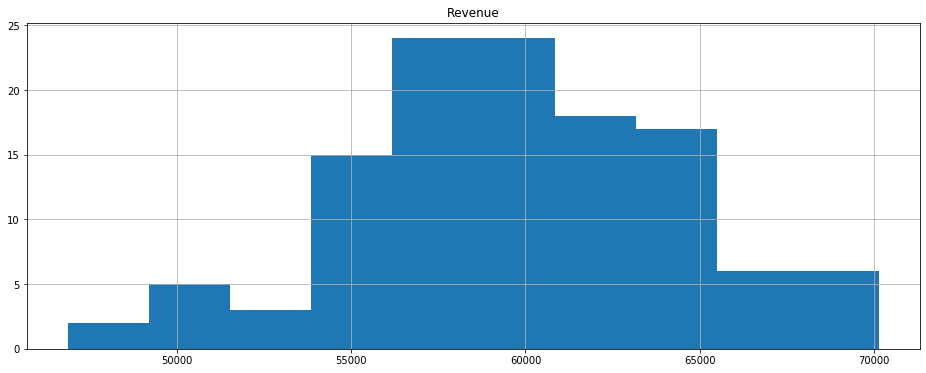

In [7]:
company_monthly_revenue.hist(bins = 10, figsize = (16,6))

In [8]:
np.mean(company_monthly_revenue["Revenue"])

59648.804606426434

### COGS consideration 
- Remember The Company sells shoes that accounts for 40% +- 10% of their Revenues (COGS)
- We will need to consider this before calculating gross revenues 

In [9]:
cogs = pd.DataFrame(-(company_monthly_revenue["Revenue"] * np.random.normal(0.4,0.1)))

In [10]:
cogs.columns = ["Cogs"]

In [11]:
company_data = pd.concat([company_monthly_revenue,cogs], axis=1)

In [12]:
company_data

,Revenue,Cogs
2010-01-31,54405.005088,-19746.990645
2010-02-28,55771.997331,-20243.157919
2010-03-31,53828.694387,-19537.811324
2010-04-30,59543.650758,-21612.127646
2010-05-31,57444.814932,-20850.328407
...,...,...
2019-08-31,63458.216422,-23032.969192
2019-09-30,69538.206674,-25239.779216
2019-10-31,59823.023968,-21713.529716
2019-11-30,65243.719052,-23681.040149


### COGS distribution 
- WE ca nsee that thre is a COGS value that is approximately around 28,000 to 26,000

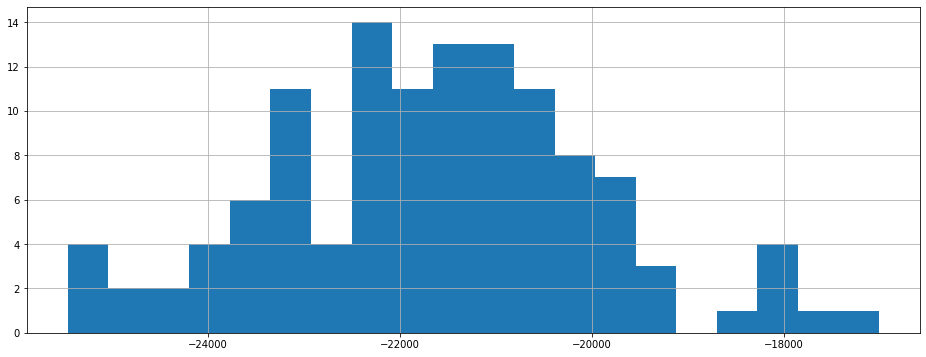

In [13]:
company_data["Cogs"].hist(bins = 20, figsize = (16,6))

In [14]:
np.mean(company_data["Cogs"])

-21650.294576207867

### Gross Claculations
- Gross will be the difference between Revenues and COGS
- Since we have already made COGS a negative value we will simply add the two to get the Gross
- the mean of the Gross should be the difference of the mean of revenues and the COGS

In [15]:
company_data["Gross"] = company_data["Revenue"] + company_data["Cogs"]

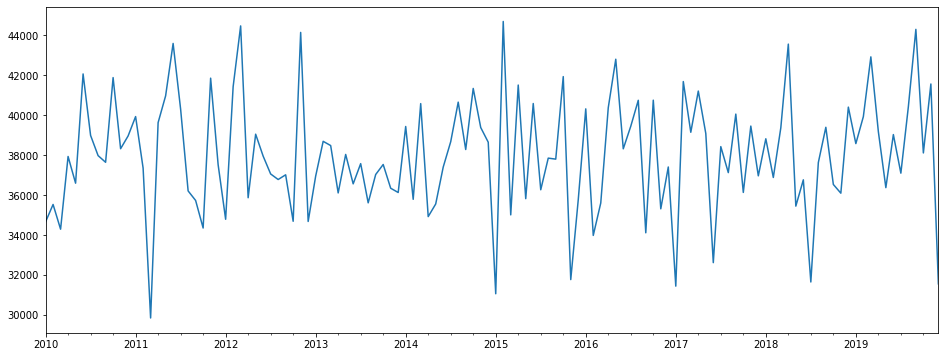

In [16]:
company_data["Gross"].plot(figsize = (16,6))

- Appears we are on the right track
- below we will summarize this for the company for the next year

In [17]:
np.mean(company_data["Gross"])

37998.51003021857

In [18]:
np.mean(company_data["Revenue"] + company_data["Cogs"])

37998.51003021857

### Summary 
- The Annual results of the company is as follows 
- The company Revenue FOr next year is projected below with deviation of 60K (5000 std X 12)
- The COGS is projected to be the below as well with a 10% standard deviation
- Gross is projected to be the below also with a Standard deviation listed below

In [19]:
## 2020 projected Revenues
np.sum(company_data["Revenue"])

7157856.5527711725

In [20]:
## 2020 COst of Goods Sold
np.sum(company_data["Cogs"])

-2598035.349144944

In [21]:
## 2020 project Gross
np.sum(company_data["Gross"])

4559821.2036262285

In [22]:
### 2020 Standard deviation of Gross
np.std(company_data["Gross"])

2960.109119656939

### Neural Network Forecasting for Jan 2020
- We have 10 years of data so we need to decide on a sample size for testing
- lets take 2 years of testing (24 months)

In [23]:
gross = pd.DataFrame(company_data["Gross"])

In [24]:
test_size = 24

In [25]:
test_index = len(company_data) - test_size

In [26]:
train = gross.iloc[:test_index]

In [27]:
test = gross.iloc[test_index:]

In [28]:
train.shape

(96, 1)

In [29]:
test.shape

(24, 1)

## Scaling the data 
- Our data was sceled on a normal distribution when created so we do not need to scale the data

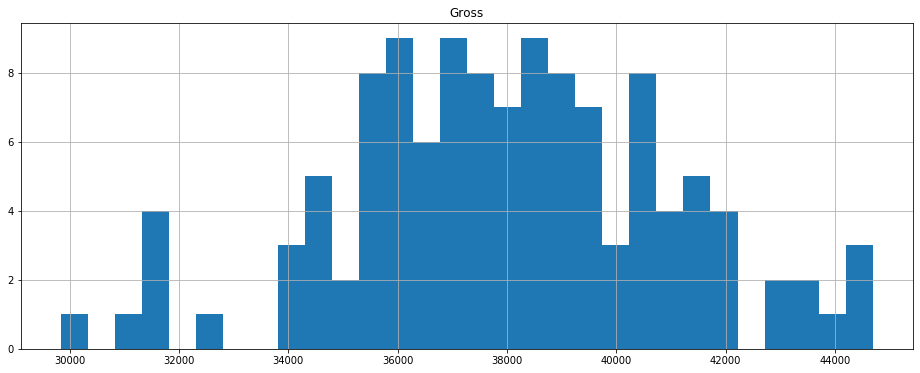

In [30]:
gross.hist(figsize = (16,6), bins = 30);

### Creating the Time Series Generator
- Length will be 3, model will attempt to predict 3 months in to the future even though we are looking for the first 
- n_features will be the number of features we are looking to predict or forecast in this case is 1 "Gross"


In [35]:
length = 3
n_features = 1

In [32]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [33]:
gen = TimeseriesGenerator(train, train, length= length, batch_size=1)

### Validation data

In [34]:
valid_gen = TimeseriesGenerator(test,test, length=length, batch_size=1)

## Early Stopping 
- Willl use to prevent Over training on the data 

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=10)

## Model Creation

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [46]:
model = Sequential()
model.add(LSTM(units=150, activation="relu", input_shape = (n_features,length)))
model.add(Dense(units=1))
model.compile(loss = "mse", optimizer = "adam", metrics = ["accuracy"])

In [47]:
model.fit_generator(generator = gen, validation_data =valid_gen, epochs = 12, callbacks = [stop])

Epoch 1/12


ValueError: cannot copy sequence with size 3 to array axis with dimension 1